In [1]:
import pandas as pd
import datetime
import random
import os
import sys

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%matplotlib inline

In [2]:
from ISS.trades import Trades

In [3]:
securityids = ['MOEX', 'SBER', 'AFKS', 'SU25081RMFS9']
dt = datetime.date(2017, 9, 11)

We can load trades for full market

In [4]:
%%time
T = Trades(engine='stock', market='shares')
print(T)
T.load()
print(T)

------------------------------------------------------------------
Trades (0 trades, 0 securityids, time: nan)
engine: stock, market: shares, boardid: None, securityid: None
------------------------------------------------------------------
------------------------------------------------------------------
Trades (357906 trades, 250 securityids, time: 2017-09-15 17:24:13)
engine: stock, market: shares, boardid: None, securityid: None
------------------------------------------------------------------
CPU times: user 6.84 s, sys: 392 ms, total: 7.23 s
Wall time: 1min 44s


In [5]:
T.trades.head()

,tradeno,tradetime,boardid,secid,price,quantity,value,period,tradetime_grp,systime,buysell,decimals
0,2748066209,09:59:31,TQBR,BANE,1979,1,1979,S,959,2017-09-15 09:59:31,S,0
1,2748066210,09:59:31,TQBR,BANE,1979,4,7916,S,959,2017-09-15 09:59:31,S,0
2,2748066211,09:59:31,TQBR,BANE,1979,3,5937,S,959,2017-09-15 09:59:31,B,0
3,2748066212,09:59:31,TQBR,BANE,1979,1,1979,S,959,2017-09-15 09:59:31,S,0
4,2748066213,09:59:31,TQBR,BANE,1979,3,5937,S,959,2017-09-15 09:59:31,B,0


Or we can load trades for specific securityid

In [6]:
%%time
T = Trades(engine='stock', market='shares', securityid='LKOH')
print(T)
T.load()
print(T)

------------------------------------------------------------------
Trades (0 trades, 0 securityids, time: nan)
engine: stock, market: shares, boardid: None, securityid: LKOH
------------------------------------------------------------------
------------------------------------------------------------------
Trades (18073 trades, 1 securityids, time: 2017-09-15 17:24:14)
engine: stock, market: shares, boardid: None, securityid: LKOH
------------------------------------------------------------------
CPU times: user 376 ms, sys: 12 ms, total: 388 ms
Wall time: 4.61 s


In [7]:
T.trades.head()

,tradeno,tradetime,boardid,secid,price,quantity,value,period,tradetime_grp,systime,buysell,decimals
0,2748066337,09:59:41,TQBR,LKOH,2966,1,2966,S,959,2017-09-15 09:59:41,S,1
1,2748066338,09:59:41,TQBR,LKOH,2966,5,14830,S,959,2017-09-15 09:59:41,S,1
2,2748066339,09:59:41,TQBR,LKOH,2966,46,136436,S,959,2017-09-15 09:59:41,B,1
3,2748066340,09:59:41,TQBR,LKOH,2966,1,2966,S,959,2017-09-15 09:59:41,S,1
4,2748066341,09:59:41,TQBR,LKOH,2966,1,2966,S,959,2017-09-15 09:59:41,B,1


We even can specify boardid, but separatedly (without securityid)

In [8]:
%%time
T = Trades(engine='stock', market='shares', boardid='TQBR')
print(T)
T.load()
print(T)

------------------------------------------------------------------
Trades (0 trades, 0 securityids, time: nan)
engine: stock, market: shares, boardid: TQBR, securityid: None
------------------------------------------------------------------
------------------------------------------------------------------
Trades (351468 trades, 223 securityids, time: 2017-09-15 17:25:55)
engine: stock, market: shares, boardid: TQBR, securityid: None
------------------------------------------------------------------
CPU times: user 6.8 s, sys: 340 ms, total: 7.14 s
Wall time: 1min 37s


In [9]:
T.trades.head()

,tradeno,tradetime,boardid,secid,price,quantity,value,period,tradetime_grp,systime,buysell,decimals
0,2748066209,09:59:31,TQBR,BANE,1979,1,1979,S,959,2017-09-15 09:59:31,S,0
1,2748066210,09:59:31,TQBR,BANE,1979,4,7916,S,959,2017-09-15 09:59:31,S,0
2,2748066211,09:59:31,TQBR,BANE,1979,3,5937,S,959,2017-09-15 09:59:31,B,0
3,2748066212,09:59:31,TQBR,BANE,1979,1,1979,S,959,2017-09-15 09:59:31,S,0
4,2748066213,09:59:31,TQBR,BANE,1979,3,5937,S,959,2017-09-15 09:59:31,B,0


We can make a plots

In [10]:
import matplotlib.pyplot as plt
from ISS.plots import tradesplot

In [11]:
%%time
T = Trades(engine='stock', market='shares', securityid='LKOH')
print(T)
T.load()
print(T)

------------------------------------------------------------------
Trades (0 trades, 0 securityids, time: nan)
engine: stock, market: shares, boardid: None, securityid: LKOH
------------------------------------------------------------------
------------------------------------------------------------------
Trades (18120 trades, 1 securityids, time: 2017-09-15 17:25:58)
engine: stock, market: shares, boardid: None, securityid: LKOH
------------------------------------------------------------------
CPU times: user 388 ms, sys: 8 ms, total: 396 ms
Wall time: 4.76 s


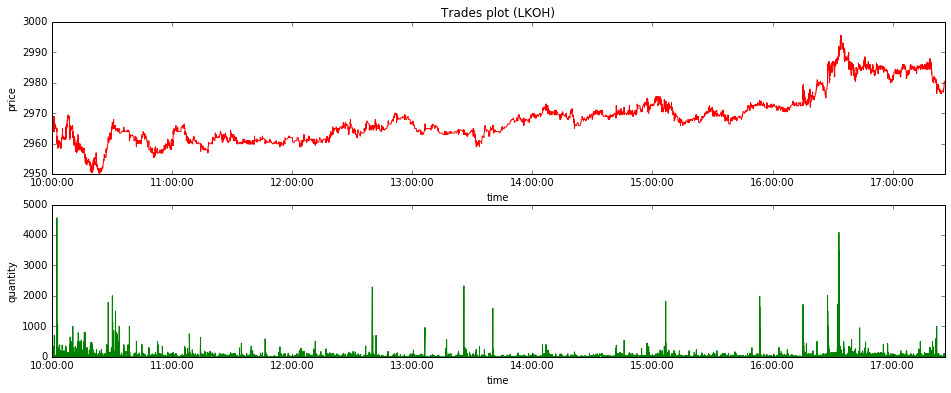

In [12]:
fig, [ax1, ax2] = tradesplot(T.trades, T.securityid)
plt.show()